In [2]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import umap.plot
import pickle

In [3]:
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_train_features.pkl", 'rb') as f:
    features = pickle.load(f)
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_train_labels.pkl", 'rb') as f:
    labels = pickle.load(f)

In [9]:
mapper = umap.UMAP().fit(features)

<AxesSubplot:>

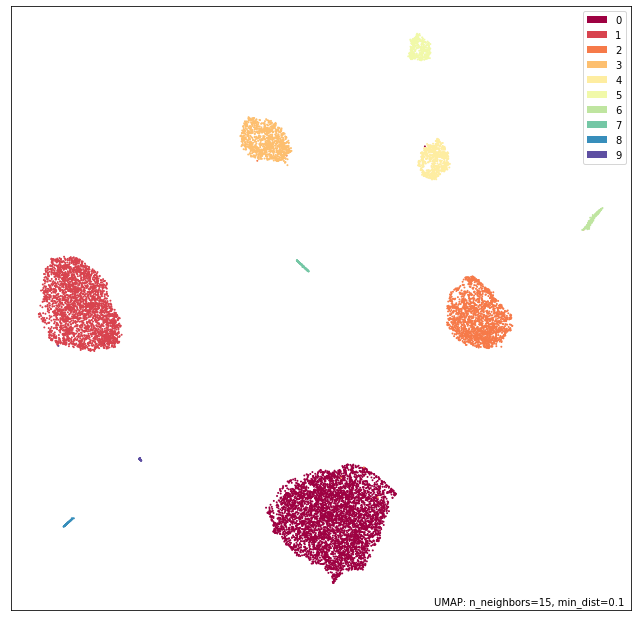

In [10]:
umap.plot.points(mapper, labels=labels)

<AxesSubplot:>

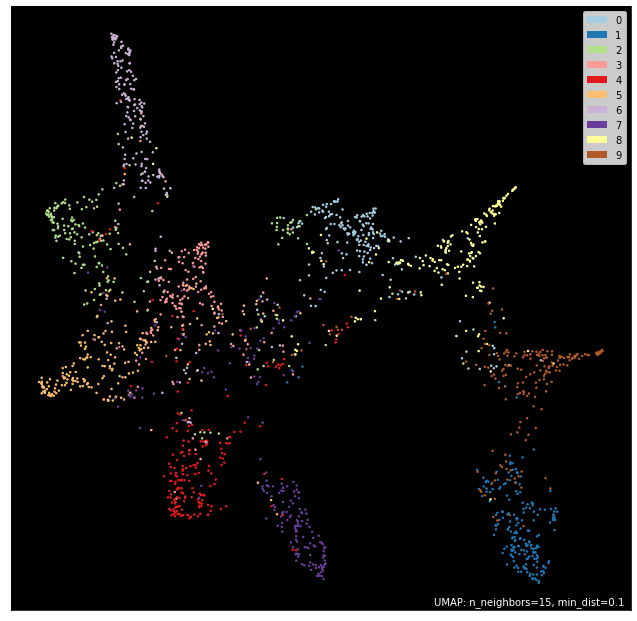

In [51]:
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_test_features.pkl", 'rb') as f:
    features = pickle.load(f)
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_test_labels.pkl", 'rb') as f:
    labels = pickle.load(f)
feat_list = []
label_list = []
for i in range(10):
    tmp_feat = features[labels==i][:200]
    tmp_label = labels[labels==i][:200]
    feat_list.append(tmp_feat)
    label_list.append(tmp_label)
features = np.concatenate(feat_list)
labels = np.concatenate(label_list)
mapper = umap.UMAP().fit(features)
umap.plot.points(mapper, labels=labels,color_key_cmap='Paired', background='black')

In [52]:
mapper

UMAP(dens_frac=0.0, dens_lambda=0.0)